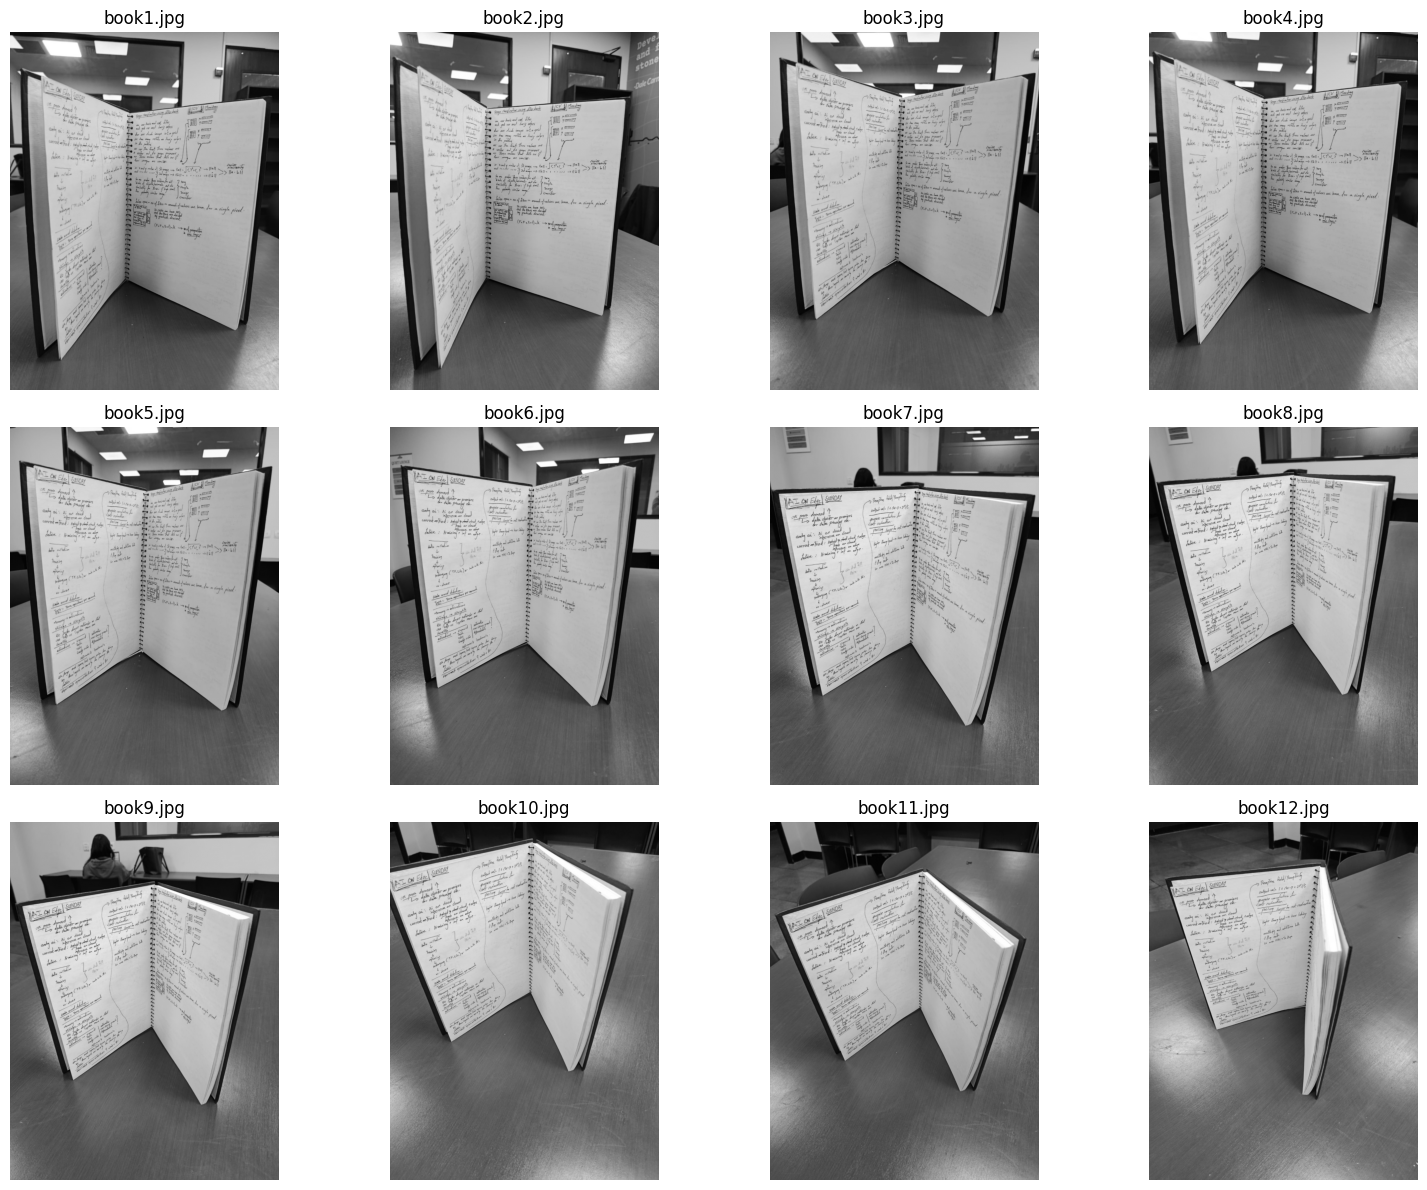

Images 1 & 2: Found 1226 point correspondences.


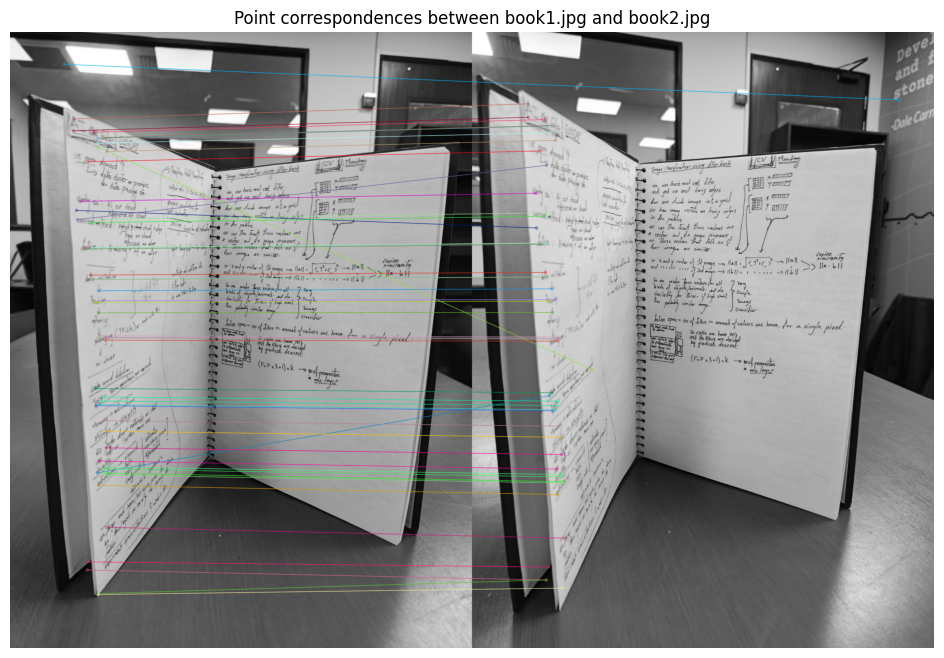

Images 2 & 3: Found 540 point correspondences.


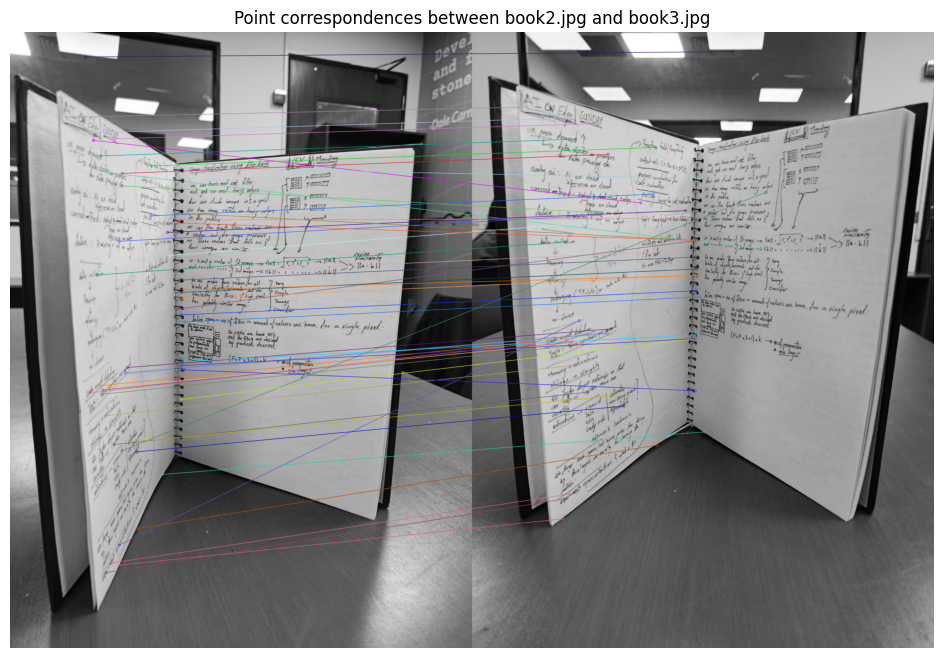

Images 3 & 4: Found 1283 point correspondences.


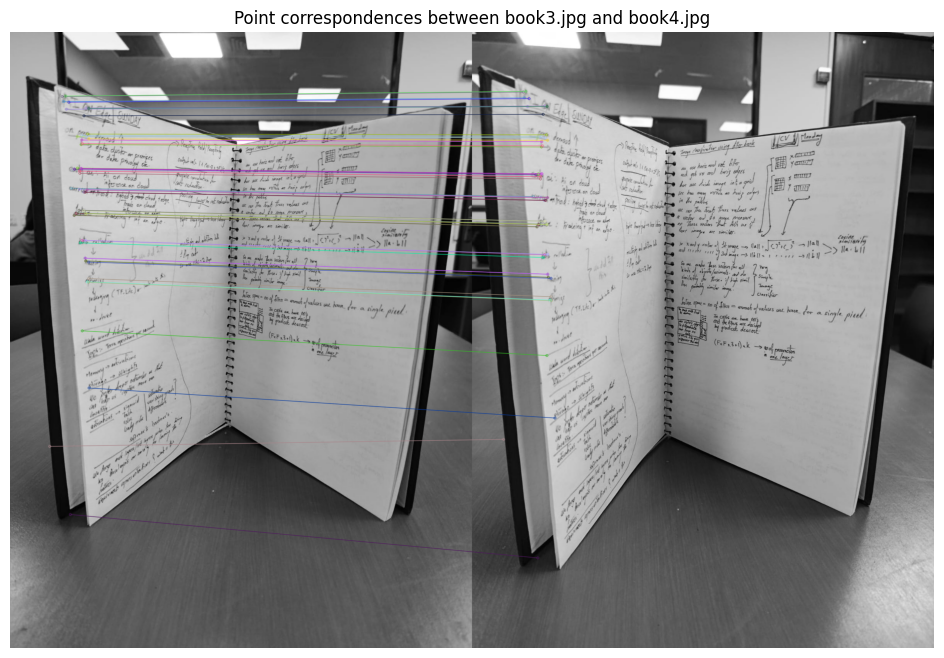

Images 4 & 5: Found 747 point correspondences.


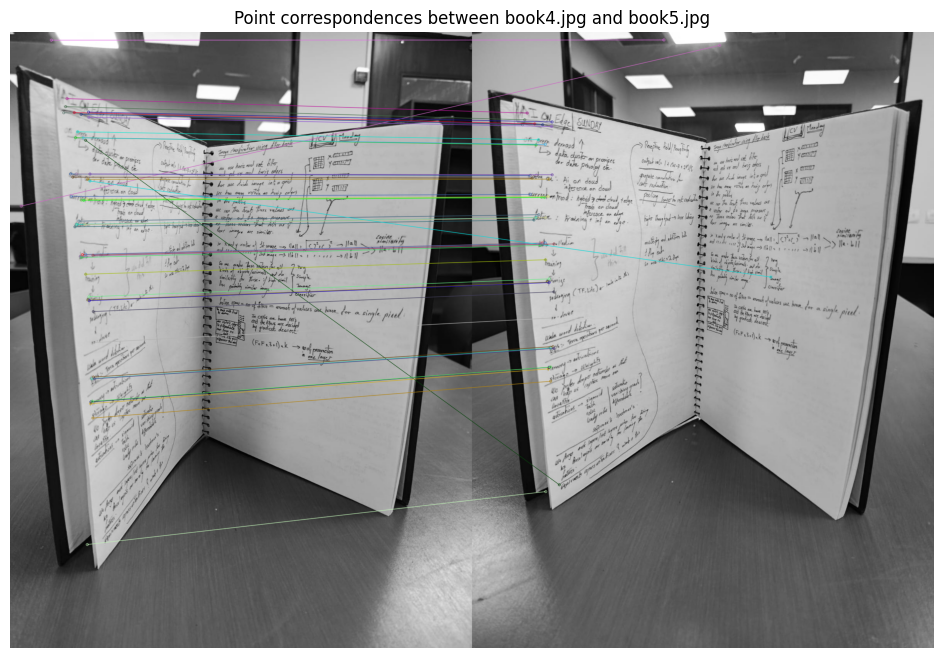

Images 5 & 6: Found 1623 point correspondences.


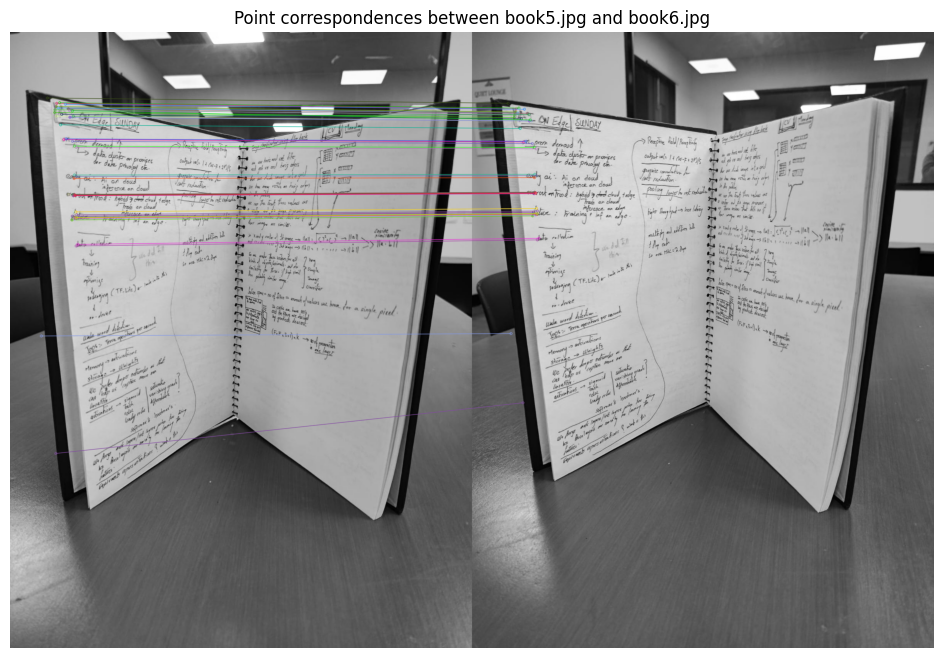

Images 6 & 7: Found 1171 point correspondences.


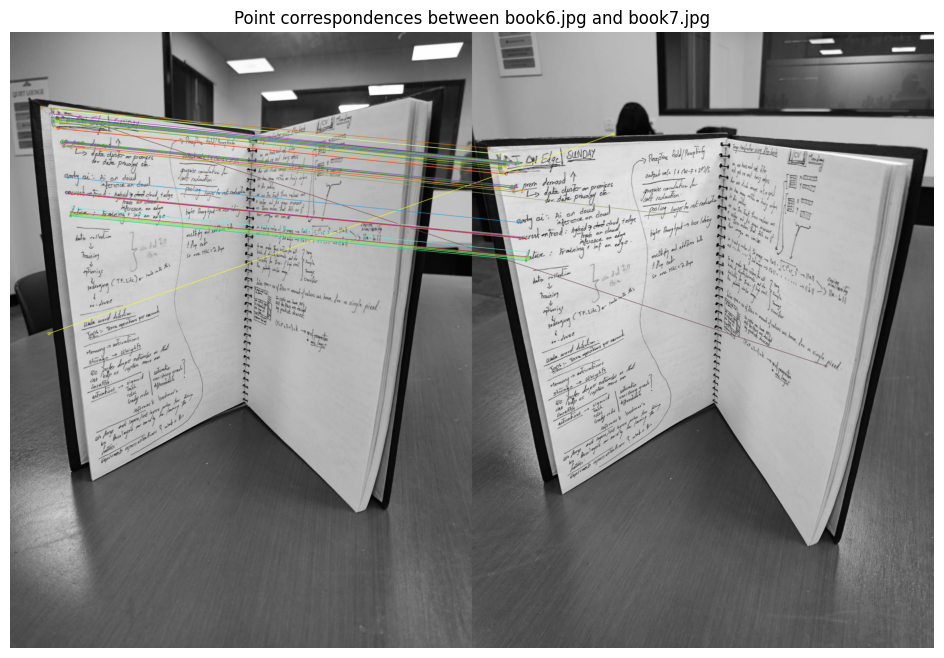

Images 7 & 8: Found 1821 point correspondences.


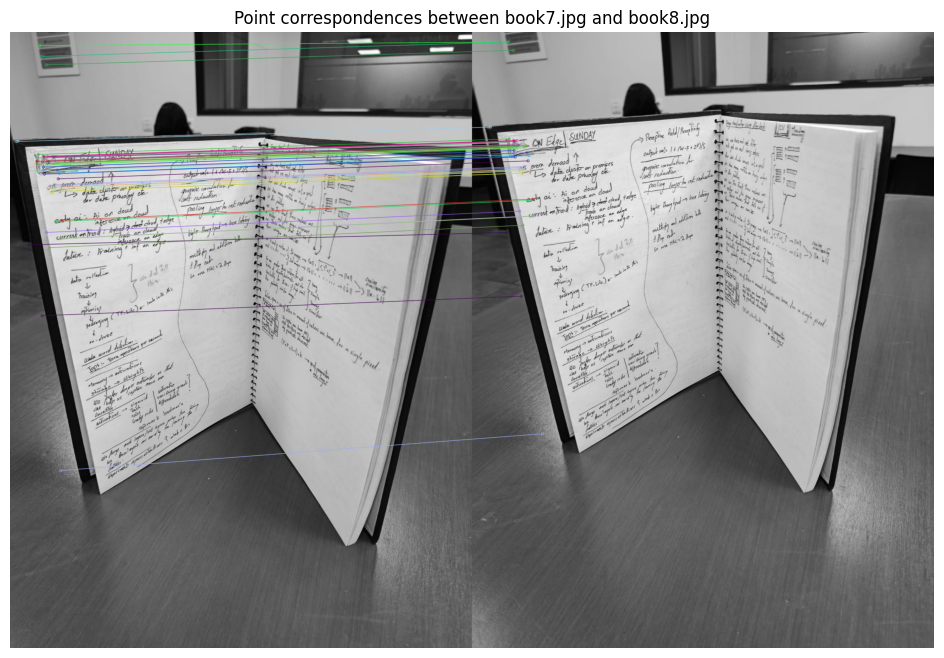

Images 8 & 9: Found 1344 point correspondences.


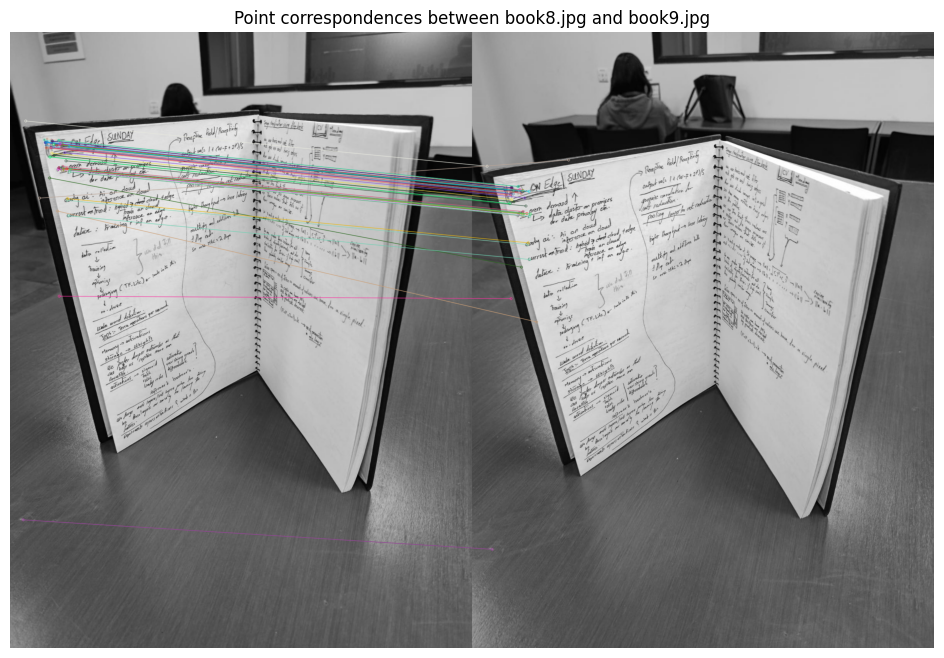

Images 9 & 10: Found 1280 point correspondences.


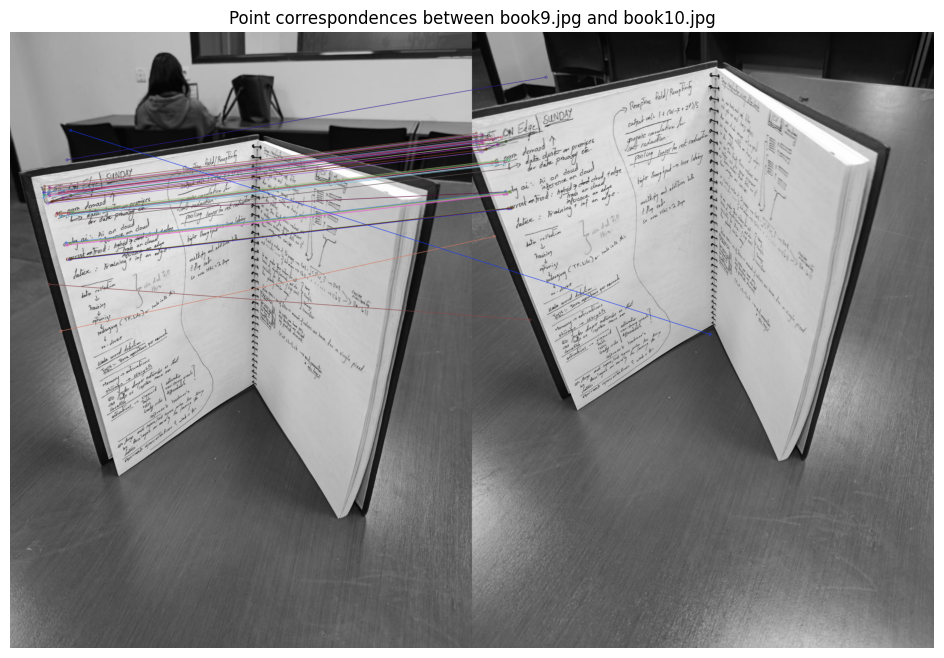

Images 10 & 11: Found 1091 point correspondences.


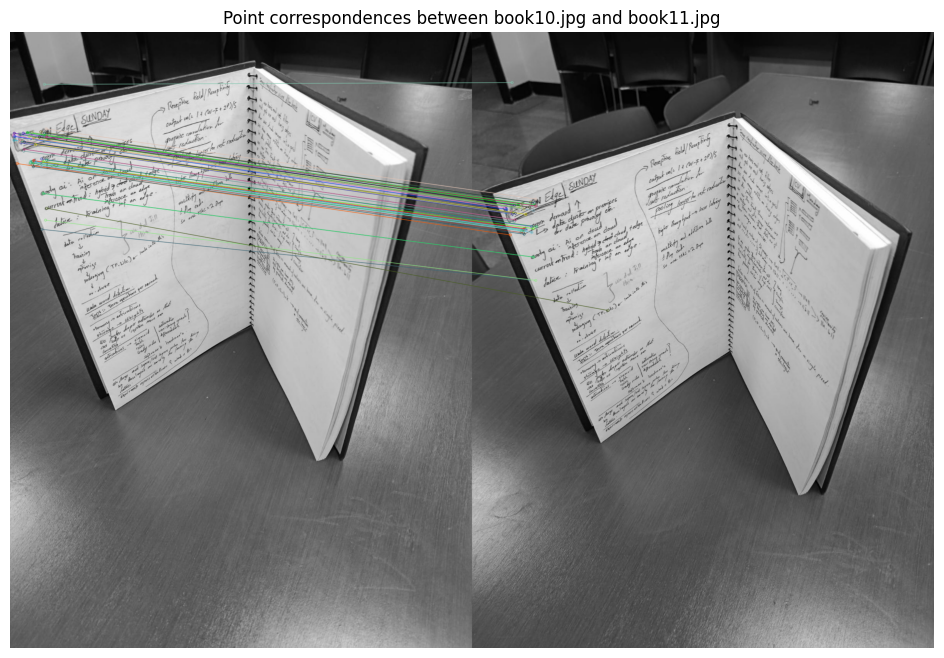

Images 11 & 12: Found 678 point correspondences.


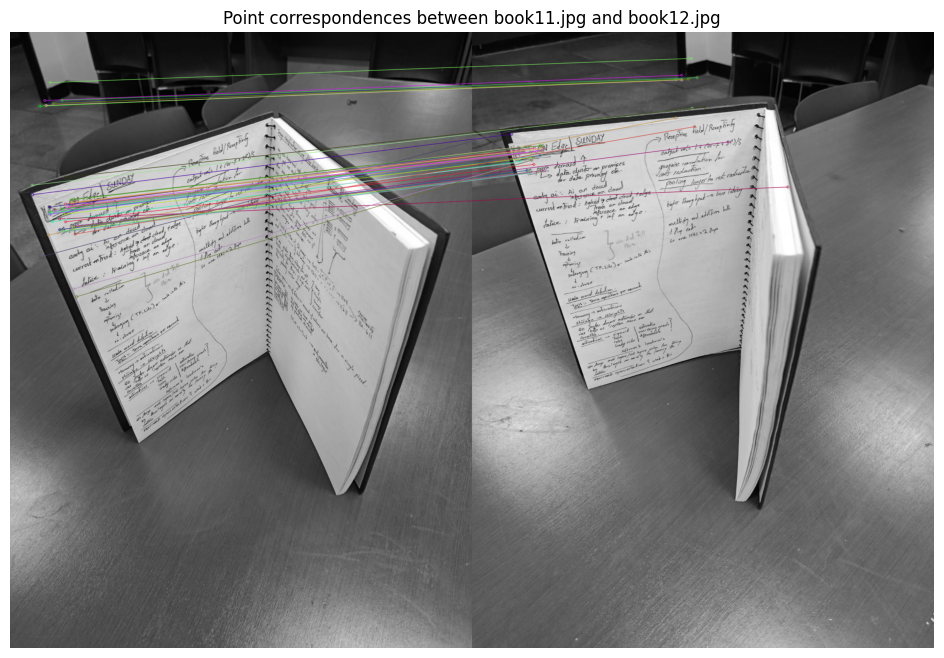

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

num_images = 12


image_path_template = "E:/Uni/Fall 25-26/CV/Project/book{}.jpg"

images = [cv2.imread(image_path_template.format(i), cv2.IMREAD_GRAYSCALE) for i in range(1, num_images+1)]


fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()  

for idx, ax in enumerate(axes):
    ax.imshow(images[idx], cmap='gray')
    ax.set_title(f"book{idx+1}.jpg")
    ax.axis('off')

plt.tight_layout()
plt.show()


sift = cv2.SIFT_create()

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

for i in range(num_images-1):
    img1 = images[i]
    img2 = images[i+1]

    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    matches = flann.knnMatch(des1, des2, k=2)

    
    good_matches = []
    pts1 = []
    pts2 = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)
            pts1.append(kp1[m.queryIdx].pt)
            pts2.append(kp2[m.trainIdx].pt)

    pts1 = np.float32(pts1)
    pts2 = np.float32(pts2)

    print(f"Images {i+1} & {i+2}: Found {len(pts1)} point correspondences.")

    
    good_matches_50 = good_matches[:50]
    pts1_50 = pts1[:50]
    pts2_50 = pts2[:50]

    
    img_matches = cv2.drawMatches(
        img1, kp1, img2, kp2, good_matches_50, None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

    plt.figure(figsize=(15, 8))
    plt.imshow(img_matches, cmap='gray')
    plt.title(f"Point correspondences between book{i+1}.jpg and book{i+2}.jpg")
    plt.axis('off')
    plt.show()
